# Lasso Regression

Another kind of regularized regression that you could use instead of ridge regression is called Lasso Regression. Like ridge regression, lasso regression adds a regularisation penalty term to the ordinary least-squares objective, that causes the model $w$ coefficients to shrink towards zero. Lasso regression uses a slightly different regularisation term called an **L1 penalty**, instead of **ridge regression's L2 penalty** as shown here.

\begin{equation}
RSS_{LASSO} (w,b) = \sum_{i=1}^{N} (y_i - (w . x_i + b))^2 + \alpha \sum_{j=1}^p |w_j|
\end{equation}

The L1 penalty looks kind of similar to the L2 penalty, in that it computes a sum over the coefficients but it's sum of the absolute values of the $w$ -coefficients instead of a sum of squares. And the results are noticeably different. With lasso regression, a subset of the coefficients are **forced to be precisely zero**. Which is a kind of **automatic feature selection,** since with the weight of zero the features are essentially ignored completely in the model. This sparse solution where only a subset of the most important features are left with non-zero weights, also makes the model **easier to interpret**.

The amount of regularization is determined by the alpha paramter. Larger alpha means more regularization and simpler linear models with weights closer to zero. setting $\alpha$ = 0 means ordinary least squares regression



### 1. Import Libraries

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Load Crime data

In [3]:
# Communities and Crime dataset
from adspy_shared_utilities import load_crime_dataset
(X_crime, y_crime) = load_crime_dataset()
X_crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,26.4,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66


In [4]:
# Variables in dataset
X_crime.columns

Index(['population', 'householdsize', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
       'PctLargHouseOccup', 'PersPerOccupHous', 'Pe

### 3. Test train split

In [8]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
print ('Training Set Dimensions : ', X_train.shape)
print ('Test Set Dimensions : ', X_test.shape)

Training Set Dimensions :  (1495, 88)
Test Set Dimensions :  (499, 88)


### 4. Scaling and Fitting Lasso

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)
linlasso

Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### 5. Accuracy Scores

In [11]:
print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))

Crime dataset
lasso regression linear model intercept: 1186.6120619985809
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054    -0.            -0.
     0.           119.6938194      0.            -0.             0.
  -169.67564456    -0.             0.            -0.             0.             0.
     0.            -0.            -0.             0.            -0.             0.
     0.           -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.             0.            -0.
 -1188.7396867     -0.            -0.            -0.          -231.42347299
     0.          1488.36512229     0.            -0.            -0.            -0.
     0.             0.             0.             0.             0.            -0.
     0.            20.14419415     0.             0.             0.             0.
     0.           339.04468804     0.             0.           459.53799903
    -0.             

In [12]:
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	PctKidsBornNeverMar, 1488.365
	PctKids2Par, -1188.740
	HousVacant, 459.538
	PctPersDenseHous, 339.045
	NumInShelters, 264.932
	MalePctDivorce, 259.329
	PctWorkMom, -231.423
	pctWInvInc, -169.676
	agePct12t29, -168.183
	PctVacantBoarded, 122.692
	pctUrban, 119.694
	MedOwnCostPctIncNoMtg, -104.571
	MedYrHousBuilt, 91.412
	RentQrange, 86.356
	OwnOccHiQuart, 73.144
	PctEmplManu, -57.530
	PctBornSameState, -49.394
	PctForeignBorn, 23.449
	PctLargHouseFam, 20.144
	PctSameCity85, 5.198


### 6. Comparing with Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print('ridge regression linear model intercept: {}'
     .format(reg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(reg.coef_ != 0)))

ridge regression linear model intercept: 3861.708902399444
R-squared score (training): 0.668
R-squared score (test): 0.520
Number of non-zero features: 88


### 7. Comparing with Ridge Regression

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 933.3906385044113
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


### 8. Variation of Performance with alpha

In [36]:
print('Lasso regression: effect of alpha regularization parameter\n')
train_score = []
test_score = []
alpha = [0.5, 1,2,3,5, 10, 20, 30, 40, 50]
for this_alpha in alpha:
    linlasso = Lasso(alpha = this_alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    train_score = np.append(train_score, r2_train)
    test_score = np.append(test_score,r2_test) 
    num_coeff_bigger = np.sum(abs(linlasso.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))


Lasso regression: effect of alpha regularization parameter

Alpha = 0.50
num abs(coeff) > 1.0: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
num abs(coeff) > 1.0: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
num abs(coeff) > 1.0: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
num abs(coeff) > 1.0: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
num abs(coeff) > 1.0: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
num abs(coeff) > 1.0: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
num abs(coeff) > 1.0: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 30.00
num abs(coeff) > 1.0: 2, r-squared training: 0.46, r-squared test: 0.45

Alpha = 40.00
num abs(coeff) > 1.0: 1, r-squared training: 0.39, r-squared test: 0.38

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.31, r-squared test: 0.30



<IPython.core.display.Javascript object>


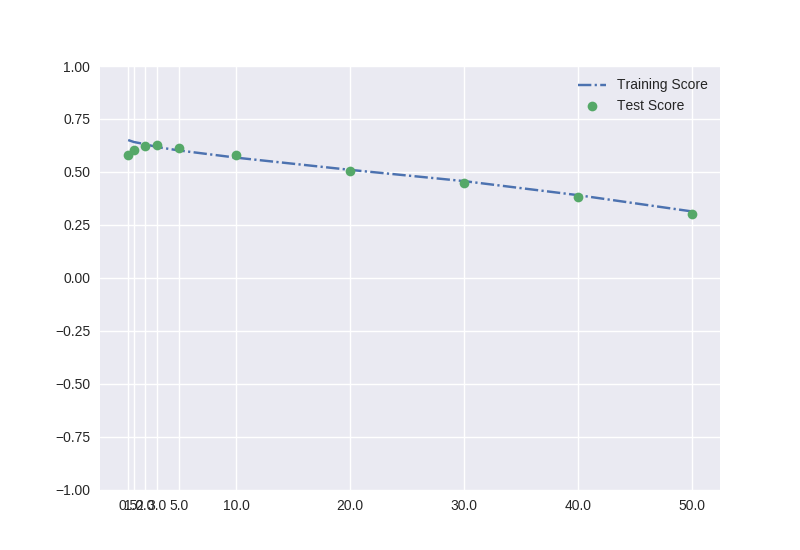

([<matplotlib.axis.XTick at 0x7f25521c4438>,
 <a list of 10 Text xticklabel objects>)

In [41]:
fig = plt.figure()
plt.plot(alpha, train_score, '-.', alpha, test_score, 'o')
plt.ylim(-1, 1)
plt.legend(labels = ['Training Score','Test Score'])
plt.xticks(alpha)